Comparative Analysis of Machine Learning and LSTM Models for Stock Price Prediction: A Case Study on JPMorgan Chase

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing libraries



In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



Download historical stock data

In [3]:
ticker = 'JPM'
start_date = '2020-01-01'
end_date = '2024-01-01'
df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']].reset_index()

[*********************100%%**********************]  1 of 1 completed


Feature engineering for traditional ML models

In [32]:


# Reset index to include 'Date' as a column
df.reset_index(inplace=True)

# Print column names to check
print(df.columns)

# If 'Date' column is not found, use the appropriate column name
if 'Date' not in df.columns:
    if 'Datetime' in df.columns:
        df.rename(columns={'Datetime': 'Date'}, inplace=True)
    else:
        print("Date column is missing or named differently.")

# Convert 'Date' to datetime if the column exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['DayOfWeek'] = df['Date'].dt.dayofweek

    X = df[['Day', 'Month', 'Year', 'DayOfWeek']]
    y = df['Close']
else:
    print("DataFrame does not contain a 'Date' column.")


Index(['index', 'Open', 'High', 'Low', 'Close'], dtype='object')
Date column is missing or named differently.
DataFrame does not contain a 'Date' column.


Description of Data

In [5]:
len(df)

1006

In [6]:
df.shape

(1006, 6)

In [7]:
df.describe()

,Date,Close,Day,Month,Year,DayOfWeek
count,1006,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,2021-12-30 11:57:08.230616320,133.535447,15.739563,6.553678,2021.495030,2.029821
min,2020-01-02 00:00:00,79.029999,1.000000,1.000000,2020.000000,0.000000
25%,2020-12-30 06:00:00,116.382498,8.000000,4.000000,2020.000000,1.000000
50%,2021-12-29 12:00:00,137.394997,16.000000,7.000000,2021.000000,2.000000
75%,2022-12-28 18:00:00,152.162498,23.000000,10.000000,2022.000000,3.000000
max,2023-12-29 00:00:00,171.779999,31.000000,12.000000,2023.000000,4.000000
std,NaN,22.376003,8.776709,3.430997,1.118579,1.394768


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1006 non-null   datetime64[ns]
 1   Close      1006 non-null   float64       
 2   Day        1006 non-null   int32         
 3   Month      1006 non-null   int32         
 4   Year       1006 non-null   int32         
 5   DayOfWeek  1006 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 31.6 KB


Univariate Analysis

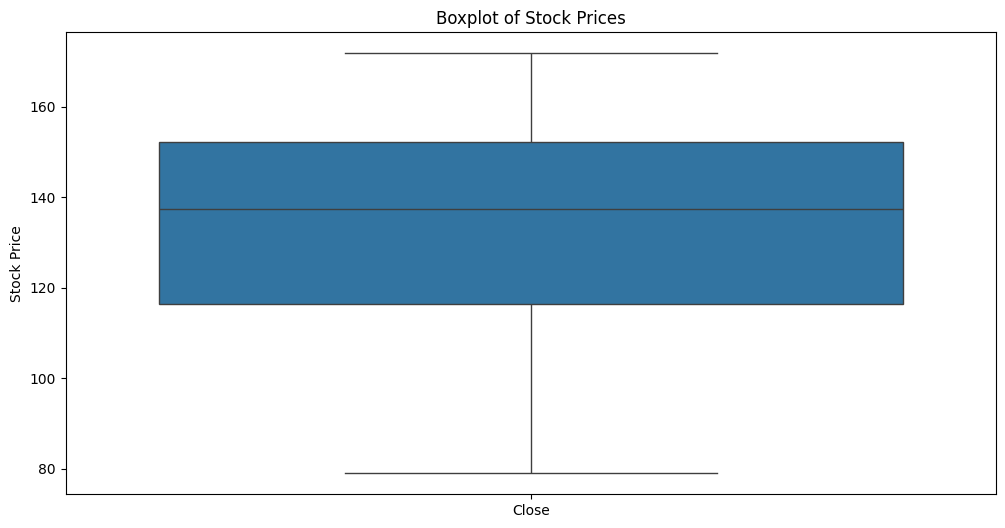

In [10]:
df = df[['Close']].copy()

# Set the figure size and create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Stock Prices')
plt.ylabel('Stock Price')
plt.show()


Bivariate Analysis

[*********************100%%**********************]  1 of 1 completed


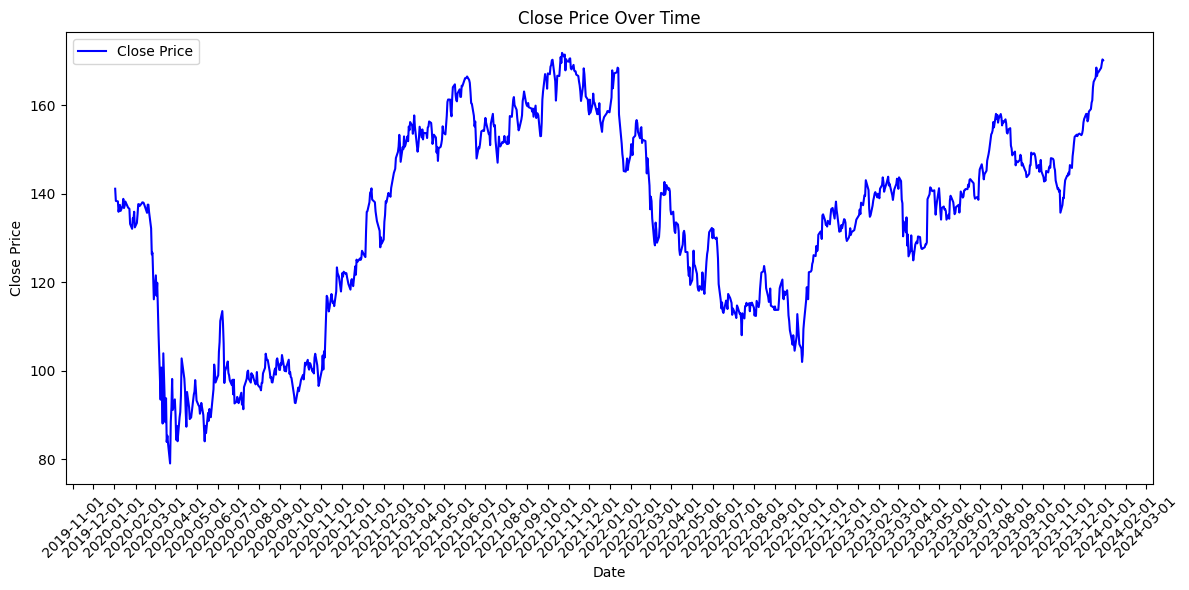

In [16]:
df = yf.download(ticker, start=start_date, end=end_date)

df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Plot the Close Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

# Formatting the x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Visualization of Relationship of all Datasets of Closing Price

[*********************100%%**********************]  1 of 1 completed


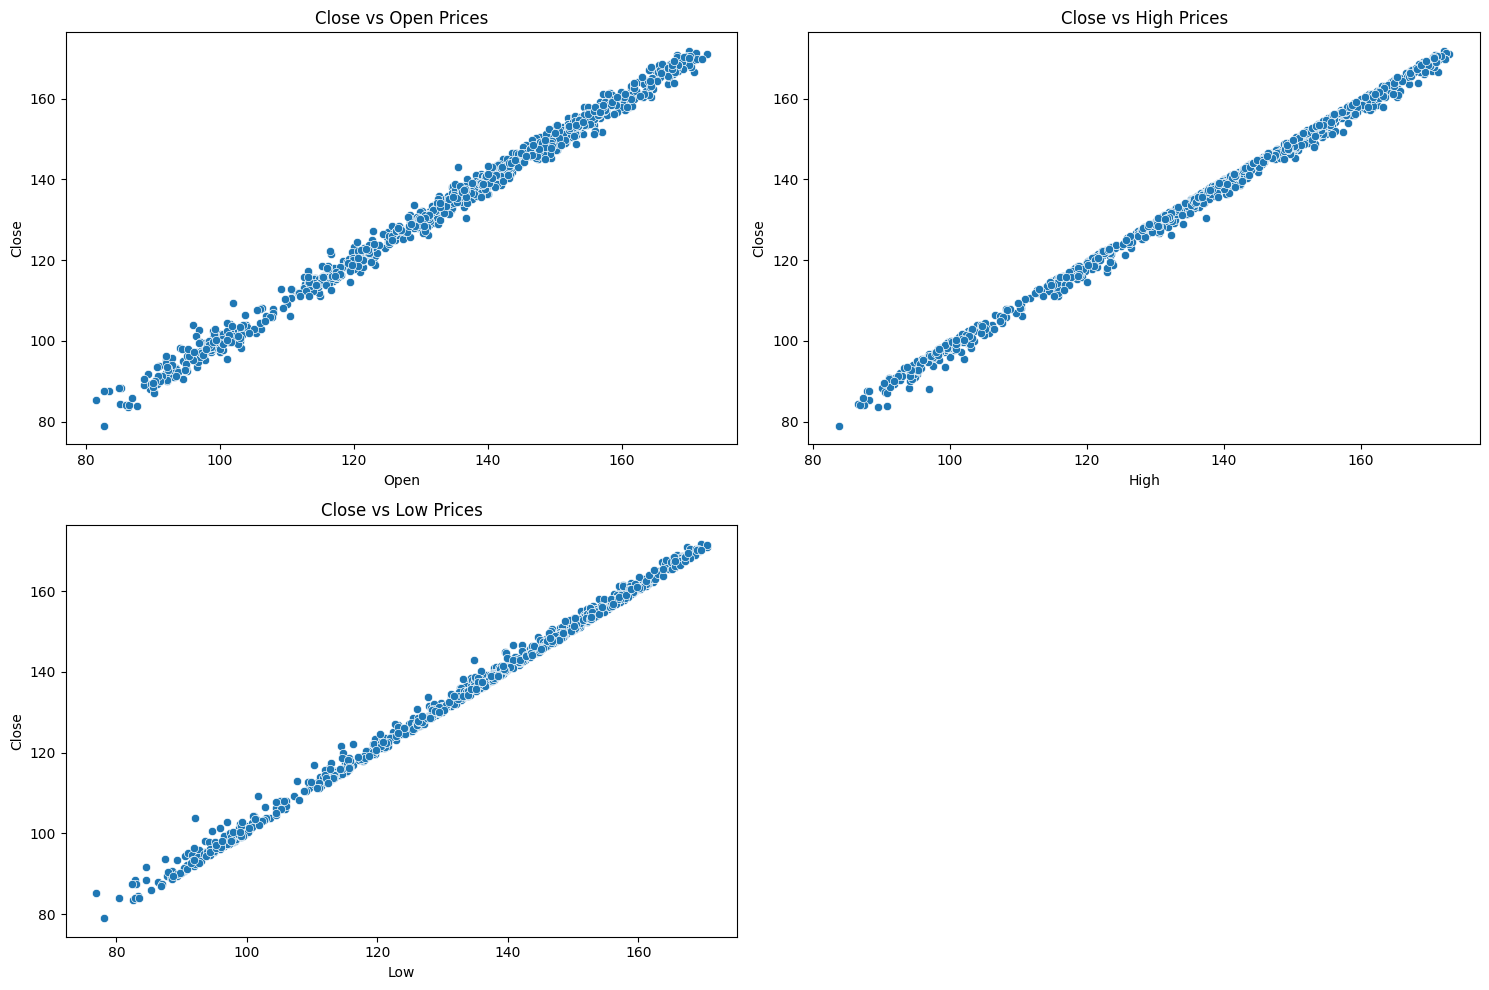

In [17]:
data = yf.download(ticker, start=start_date, end=end_date)

# Ensure that the 'Date' column is in datetime format
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame with relevant columns for visualization
df = data[['Open', 'High', 'Low', 'Close']]

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Scatter plot of 'Close' vs 'Open'
plt.subplot(2, 2, 1)
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Close vs Open Prices')

# Scatter plot of 'Close' vs 'High'
plt.subplot(2, 2, 2)
sns.scatterplot(x='High', y='Close', data=df)
plt.title('Close vs High Prices')

# Scatter plot of 'Close' vs 'Low'
plt.subplot(2, 2, 3)
sns.scatterplot(x='Low', y='Close', data=df)
plt.title('Close vs Low Prices')

# Correlation heatmap of all columns

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Distribution of stock prices

[*********************100%%**********************]  1 of 1 completed


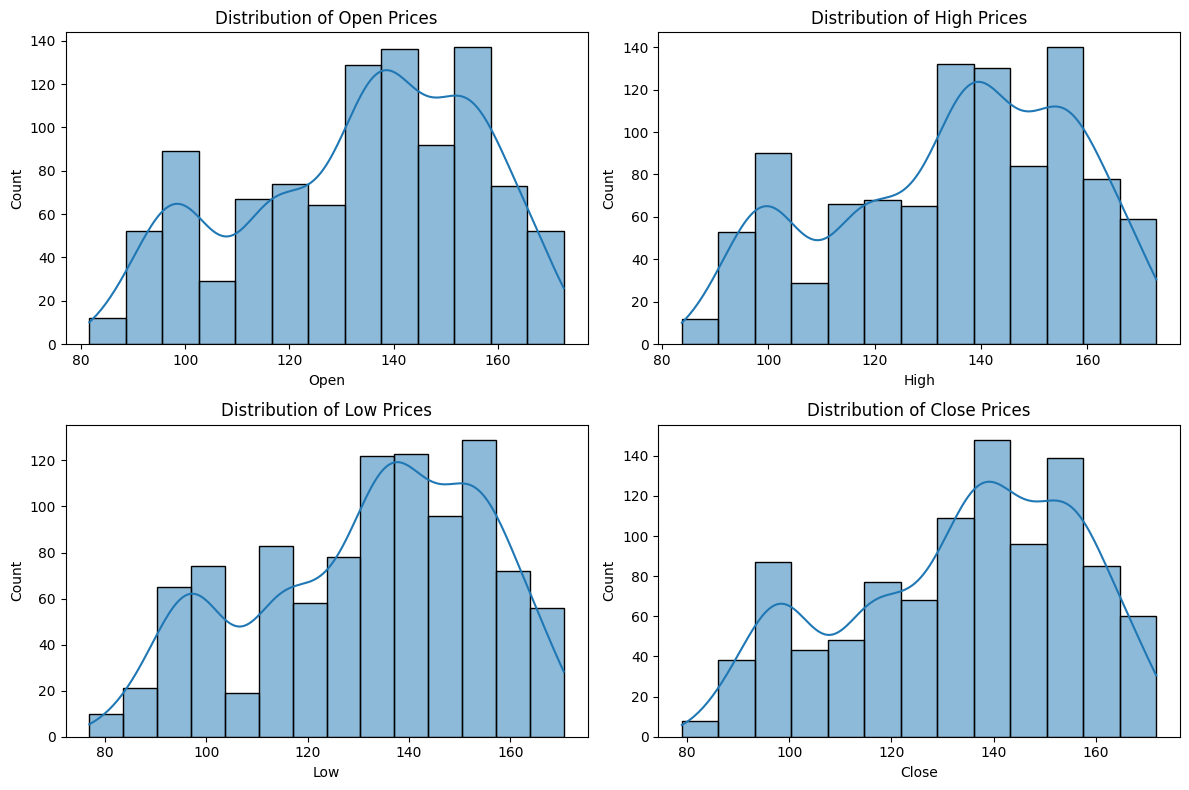

In [18]:
data = yf.download(ticker, start=start_date, end=end_date)

# Ensure that the 'Date' column is in datetime format
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# Create a figure with subplots
plt.figure(figsize=(12, 8))

# Plot the distribution for 'Open'
plt.subplot(2, 2, 1)
sns.histplot(data['Open'], kde=True)  # Use 'data' instead of 'df'
plt.title('Distribution of Open Prices')

# Plot the distribution for 'High'
plt.subplot(2, 2, 2)
sns.histplot(data['High'], kde=True)  # Use 'data' instead of 'df'
plt.title('Distribution of High Prices')

# Plot the distribution for 'Low'
plt.subplot(2, 2, 3)
sns.histplot(data['Low'], kde=True)  # Use 'data' instead of 'df'
plt.title('Distribution of Low Prices')

# Plot the distribution for 'Close'
plt.subplot(2, 2, 4)
sns.histplot(data['Close'], kde=True)  # Use 'data' instead of 'df'
plt.title('Distribution of Close Prices')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Pair plot of stock prices

[*********************100%%**********************]  1 of 1 completed


<Figure size 1200x800 with 0 Axes>

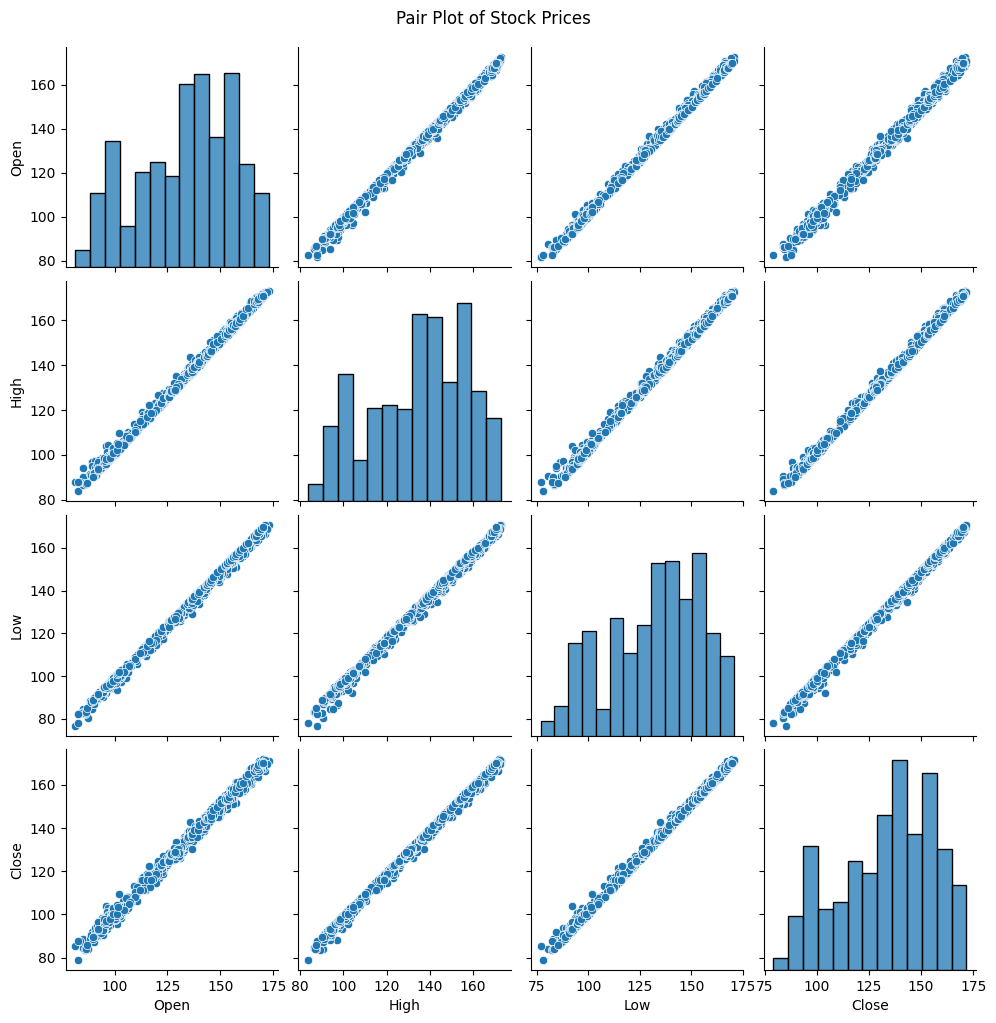

In [19]:
data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to use 'Date' column and ensure it's in datetime format
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])

# Create a DataFrame with relevant columns for EDA
df = data[['Open', 'High', 'Low', 'Close']]

# Pair Plot: Visualize relationships between all pairs of features
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.suptitle('Pair Plot of Stock Prices', y=1.02)
plt.show()

Correlation Heatmap od stock prices

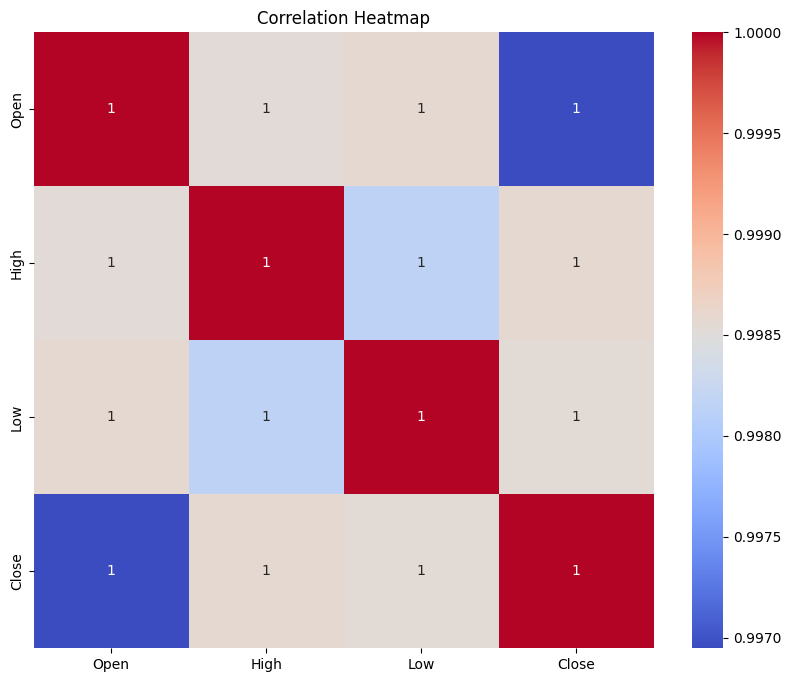

In [53]:


# Ensure 'Date' column is not present in the DataFrame
if 'Date' in df.columns:
    df_heatmap = df.drop(columns=['Date'])
else:
    df_heatmap = df

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')  # Calculate and plot correlations
plt.title('Correlation Heatmap')
plt.show()


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KNN

KNN Regressor Performance:
Mean Absolute Error: 5.970673105976369
Mean Squared Error: 57.70477072116948
R-squared: 0.8818364616560529


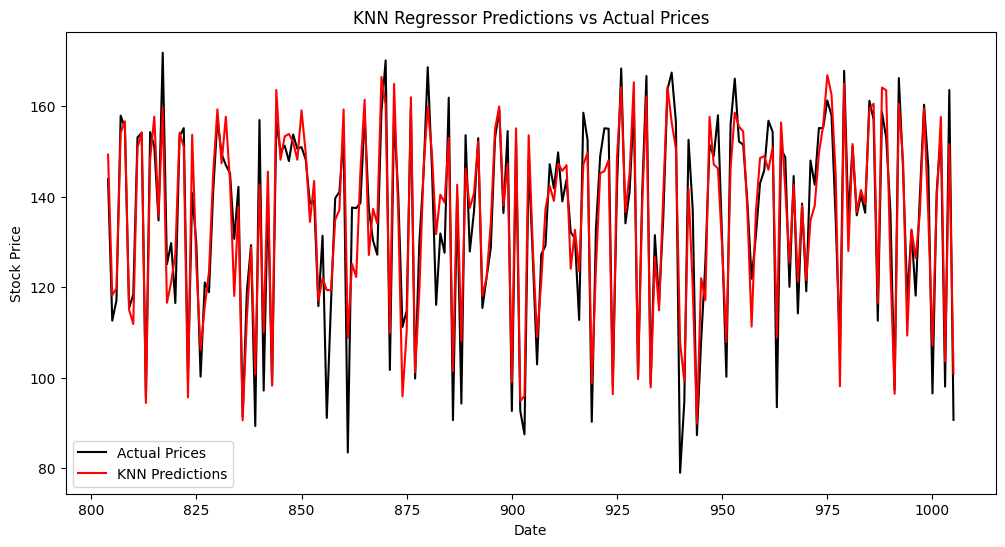

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
print("KNN Regressor Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual Prices', color='black')
plt.plot(data.index[-len(y_test):], y_pred, label='KNN Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('KNN Regressor Predictions vs Actual Prices')
plt.legend()
plt.show()


Random Forest predictior

Random Forest Regressor Performance:
Mean Absolute Error: 5.970673105976369
Mean Squared Error: 57.70477072116948
R-squared: 0.8818364616560529


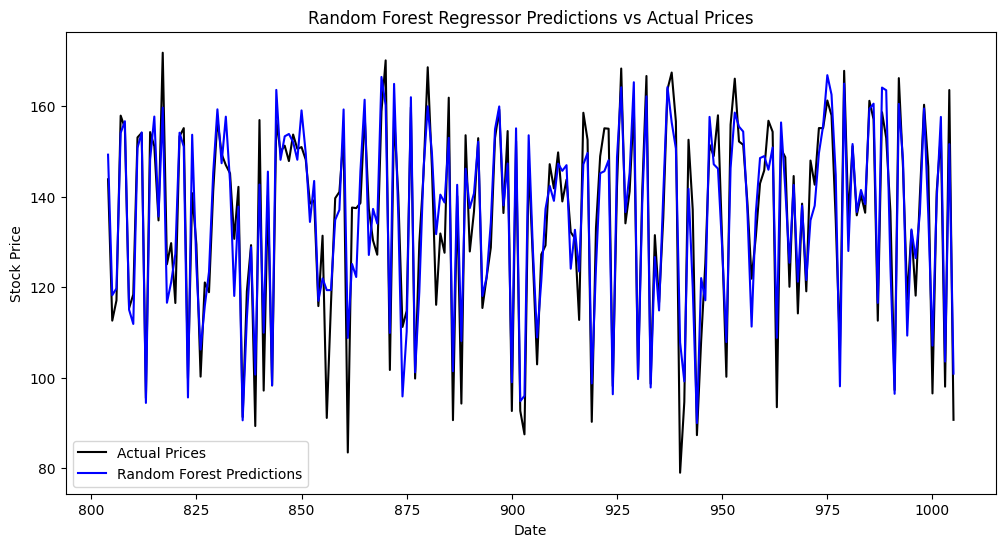

In [39]:
print("Random Forest Regressor Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual Prices', color='black')
plt.plot(data.index[-len(y_test):], y_pred, label='Random Forest Predictions', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Random Forest Regressor Predictions vs Actual Prices')
plt.legend()
plt.show()


Support Vector Regression

Support Vector Regression Performance:
Mean Absolute Error: 5.970673105976369
Mean Squared Error: 57.70477072116948
R-squared: 0.8818364616560529


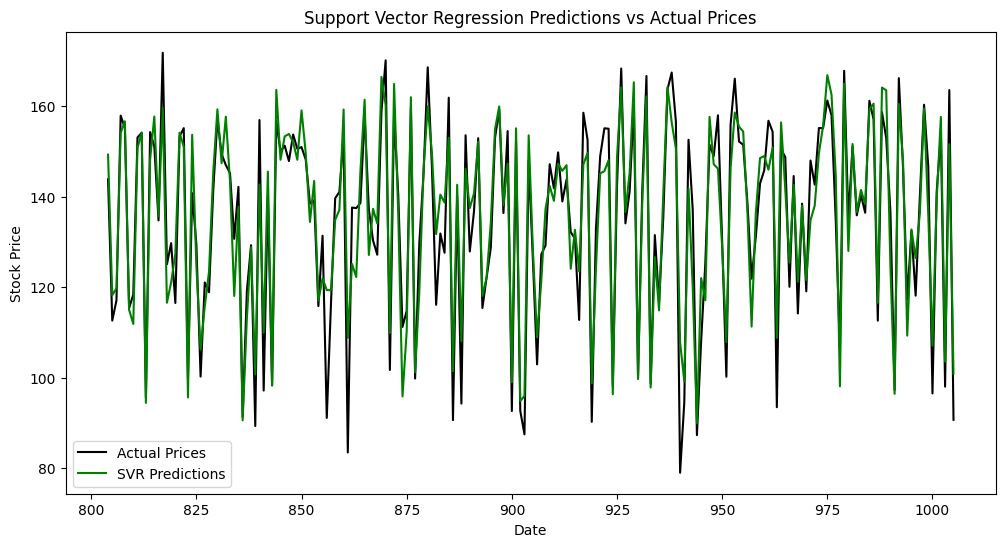

In [40]:
print("Support Vector Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual Prices', color='black')
plt.plot(data.index[-len(y_test):], y_pred, label='SVR Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Support Vector Regression Predictions vs Actual Prices')
plt.legend()
plt.show()


LSTM Model

NameError: name 'seq_length' is not defined

In [45]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Prepare data for LSTM

[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.3355 - val_loss: 0.0213
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0173 - val_loss: 0.0061
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0029 - val_loss: 0.0030
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


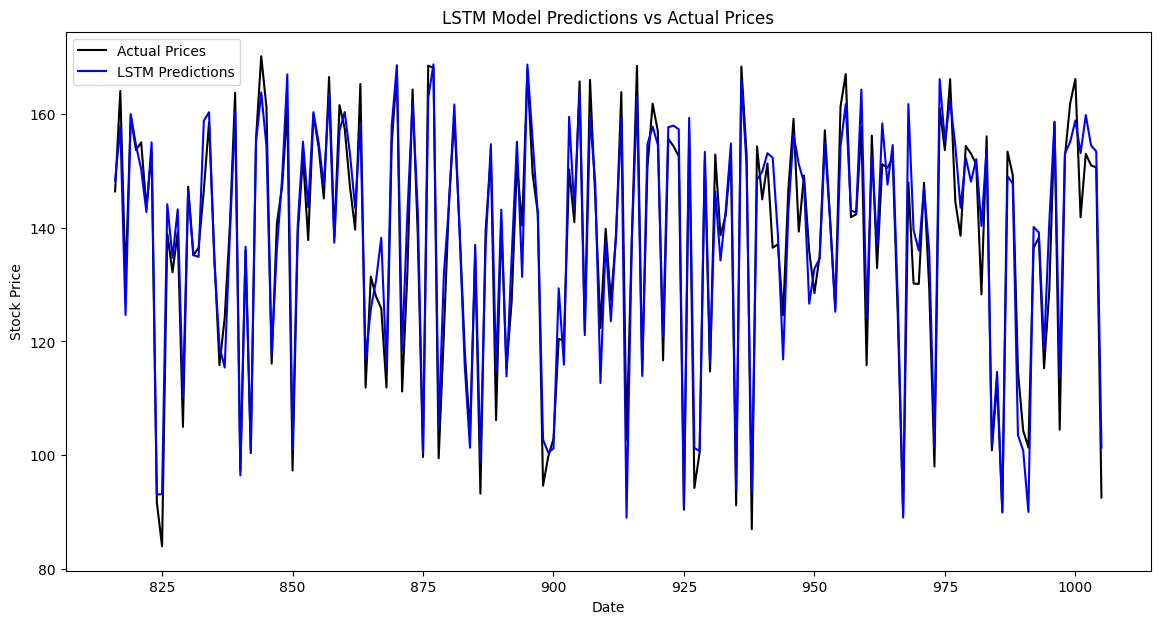

In [50]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download historical stock data
ticker = 'JPM'
start_date = '2020-01-01'
end_date = '2024-01-01'
df = yf.download(ticker, start=start_date, end=end_date)
df.reset_index(inplace=True)

# Prepare the data
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Open', 'High', 'Low', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])  # target is 'Close'
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and compile the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and test labels
y_pred = scaler.inverse_transform(np.concatenate([np.zeros((y_pred.shape[0], 3)), y_pred], axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], 3)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='black')
plt.plot(df.index[-len(y_test):], y_pred, label='LSTM Predictions', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LSTM Model Predictions vs Actual Prices')
plt.legend()
plt.show()
